In [2]:
import pandas as pd
import numpy as np
import os

years_DepEP = []

# loop through the csvs in data/DepEP and add the dataframe to the list
for file in os.listdir('data/DepEP'):
    if file.endswith('.csv'):
        years_DepEP.append(pd.read_csv('data/DepEP/' + file))

# print some info about the dataframes
len(years_DepEP), years_DepEP[0].shape, years_DepEP[0].columns

(23,
 (46, 4),
 Index(['Department of Environmental Protection 2000 Revenues', ' 1998 Actual',
        ' 1999 Estimated', ' 2000 Estimated'],
       dtype='object'))

In [12]:
# for each of the things in years create a new data frame with the sum of all funding resources
sums_DepEP = {}
for year in years_DepEP:
    column = year.columns[1]

    # convert to numeric
    year[column] = pd.to_numeric(year[column], errors='coerce')
    sums_DepEP[int(column.split(' ')[1])] = year[column].sum()

sums_DepEP

{1998: 92870,
 1999: 98178,
 2000: 101864,
 2001: 87857,
 2002: 116839.0,
 2003: 105399,
 2004: 127820.0,
 2005: 118534,
 2006: 138993,
 2007: 155989,
 2008: 144541,
 2009: 158757,
 2010: 143841,
 2011: 145429,
 2012: 136194.0,
 2013: 147103.0,
 2014: 183043,
 2015: 136928,
 2016: 153732,
 2017: 153846,
 2018: 149535,
 2019: 145024,
 2020: 135267}

In [13]:
# convert the dictionary to a dataframe
sums_DepEP_df = pd.DataFrame.from_dict(sums_DepEP, orient='index', columns=['Total Funding'])
sums_DepEP_df

,Total Funding
1998,92870.0
1999,98178.0
2000,101864.0
2001,87857.0
2002,116839.0
2003,105399.0
2004,127820.0
2005,118534.0
2006,138993.0
2007,155989.0


<Axes: title={'center': 'Total Funding for Department of Energy Environmental Programs'}>

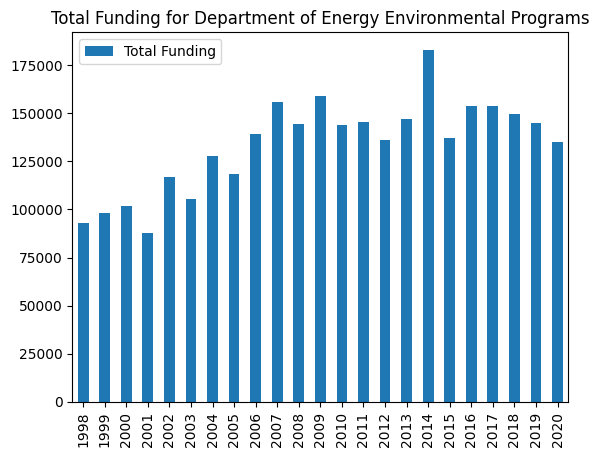

In [16]:
# plot the data
sums_DepEP_df.plot(kind='bar', title='Total Funding for Department of Energy Environmental Programs')

In [17]:
years_DepEPFedRev = []

# loop through the csvs in data/DepEPFedRev and add the dataframe to the list
for file in os.listdir('data/DepEPFedRev'):
    if file.endswith('.csv'):
        years_DepEPFedRev.append(pd.read_csv('data/DepEPFedRev/' + file))

# print some info about the dataframes
len(years_DepEPFedRev), years_DepEPFedRev[0].shape, years_DepEPFedRev[0].columns

(23,
 (30, 4),
 Index(['Department of Environmental Protection 2000 Revenues', ' 1998 Actual',
        ' 1999 Estimated', ' 2000 Estimated'],
       dtype='object'))

In [18]:
# for each of the things in years create a new data frame with the sum of all funding resources
sums_DepEPFedRev = {}
for year in years_DepEPFedRev:
    column = year.columns[1]

    # convert to numeric
    year[column] = pd.to_numeric(year[column], errors='coerce')
    sums_DepEPFedRev[int(column.split(' ')[1])] = year[column].sum()

sums_DepEPFedRev

{1998: 38431,
 1999: 34679,
 2000: 35193,
 2001: 34549,
 2002: 42753,
 2003: 45771,
 2004: 47888,
 2005: 65911,
 2006: 55395,
 2007: 41612,
 2008: 62206,
 2009: 42772,
 2010: 49773,
 2011: 62271,
 2012: 56354,
 2013: 58928,
 2014: 40731,
 2015: 44521,
 2016: 43329,
 2017: 51302,
 2018: 41348,
 2019: 51021,
 2020: 43536}

In [19]:
# convert the dictionary to a dataframe
sums_DepEPFedRev_df = pd.DataFrame.from_dict(sums_DepEPFedRev, orient='index', columns=['Total Funding'])
sums_DepEPFedRev_df.head()

,Total Funding
1998,38431
1999,34679
2000,35193
2001,34549
2002,42753


<Axes: title={'center': 'Total Funding for Department of Energy Environmental Programs'}>

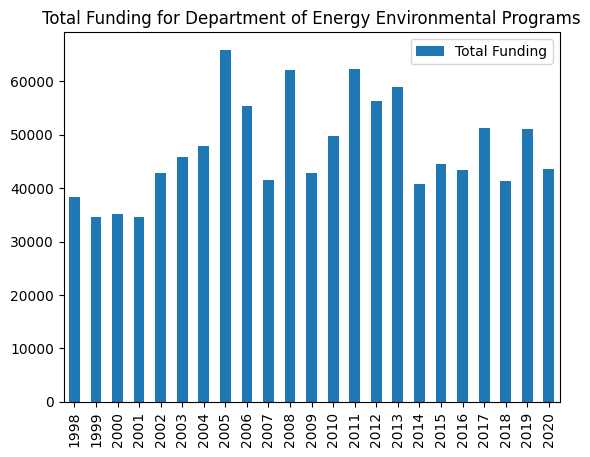

In [20]:
# plot the data
sums_DepEPFedRev_df.plot(kind='bar', title='Total Funding for Department of Energy Environmental Programs')

<Axes: >

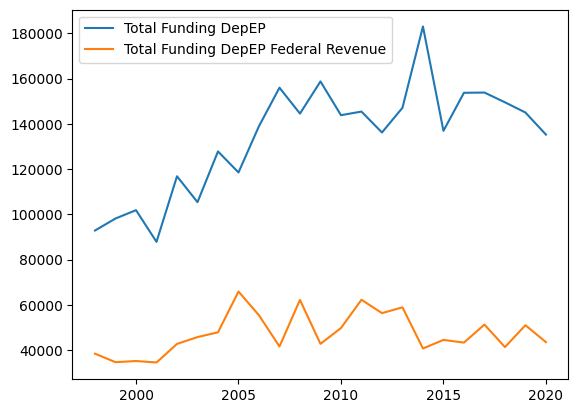

In [25]:
# make a grouped bar graph with the two dataframes
pd.concat(
    [
        sums_DepEP_df.rename(columns={'Total Funding': 'Total Funding DepEP'}),
        sums_DepEPFedRev_df.rename(columns={'Total Funding': 'Total Funding DepEP Federal Revenue'})
    ],
    axis=1
).plot.line()

(0.0, 67479.1)

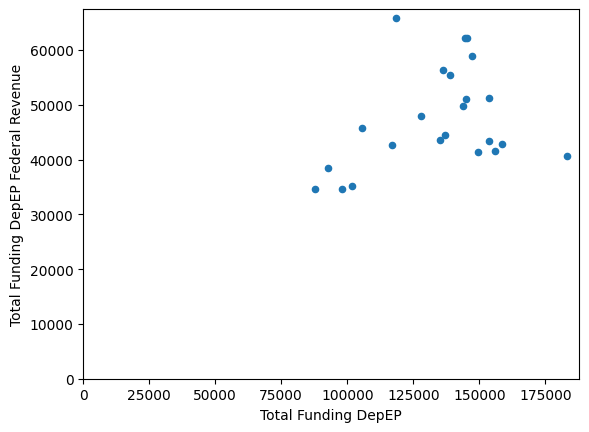

In [ ]:
import matplotlib.pyplot as plt

# make a scatter plot with the two dataframes
pd.concat(
    [
        sums_DepEP_df.rename(columns={'Total Funding': 'Total Funding State DepEP'}),
        sums_DepEPFedRev_df.rename(columns={'Total Funding': 'Total Funding DepEP Federal Revenue'})
    ],
    axis=1
).plot.scatter(x='Total Funding DepEP', y='Total Funding DepEP Federal Revenue')

# set the x and y limits to start at 0
plt.xlim(0)
plt.ylim(0)

In [41]:
pricing_df = pd.read_csv('data/Clean Energy Pricing/pricing_data.csv')
# remove all commas in the data
pricing_df = pricing_df.replace(',', '', regex=True)
# convert the columns to numeric
pricing_df = pricing_df.apply(pd.to_numeric, errors='coerce')
pricing_df.tail()

,YEARS,COAL PRICES,ENERGY AVG PRICES,MOTOR GASOLINE PRICES,PETROLEUM,NATURAL GAS,RENEWABLES QUANTITY,TOTAL QUANTITIY,NONRENEWABLE QUANTITIY,FOSSIL FUEL AVG PRICE
48,2018,3.51,20.12,22.19,20.93,6.49,31667,366040,334373,13.2800
49,2019,3.07,19.91,20.93,20.07,6.47,30656,308802,278146,12.6350
50,2020,2.82,18.73,18.08,17.03,6.35,30746,310053,279307,11.0700
51,2021,3.17,21.82,24.16,22.55,7.64,31232,324726,293494,14.3800
52,2022,5.21,27.15,31.68,31.16,10.24,33259,328596,295337,19.5725


In [43]:
# only include the years between 1998 and 2020
pricing_df = pricing_df[(pricing_df['YEARS'] >= 1998) & (pricing_df['YEARS'] <= 2020)]
pricing_df = pricing_df.set_index('YEARS')
pricing_df.head()

,COAL PRICES,ENERGY AVG PRICES,MOTOR GASOLINE PRICES,PETROLEUM,NATURAL GAS,RENEWABLES QUANTITY,TOTAL QUANTITIY,NONRENEWABLE QUANTITIY,FOSSIL FUEL AVG PRICE
YEARS,,,,,,,,,
1998,1.59,8.89,8.10,6.52,4.21,38653,323296,284643,5.1050
1999,1.45,9.18,8.95,7.08,4.45,39706,342452,302746,5.4825
2000,1.39,11.13,11.77,9.70,5.77,40148,338189,298041,7.1575
2001,2.27,11.13,11.07,8.99,6.36,28837,347027,318190,7.1725
2002,1.87,10.59,10.28,8.54,5.66,28506,350805,322299,6.5875


<Axes: xlabel='Total Funding DepEP', ylabel='RENEWABLES QUANTITY'>

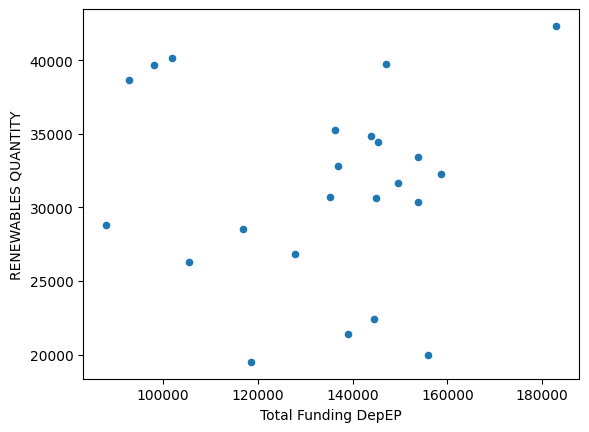

In [52]:
# make a scatter plot of RENEWABLES QUANTITY in pricing_df and sums_DepEP_df
pd.concat(
    [
        sums_DepEP_df.rename(columns={'Total Funding': 'Total Funding DepEP'}),
        pricing_df['RENEWABLES QUANTITY']
    ],
    axis=1
).plot.scatter(y='RENEWABLES QUANTITY', x='Total Funding DepEP')

163.0083333333333333 92870
166.5750000000000000 98178
172.2000000000000000 101864
177.0666666666666667 87857
179.8750000000000000 116839.0
183.9583333333333333 105399
188.8833333333333333 127820.0
195.2916666666666667 118534
201.5916666666666667 138993
207.3424166666666667 155989
215.3025000000000000 144541
214.5370000000000000 158757
218.0555000000000000 143841
224.9391666666666667 145429
229.5939166666666667 136194.0
232.9570833333333333 147103.0
236.7361666666666667 183043
237.0170000000000000 136928
240.0071666666666667 153732
245.1195833333333333 153846
251.1068333333333333 149535
255.6574166666666667 145024
258.8111666666666667 135267


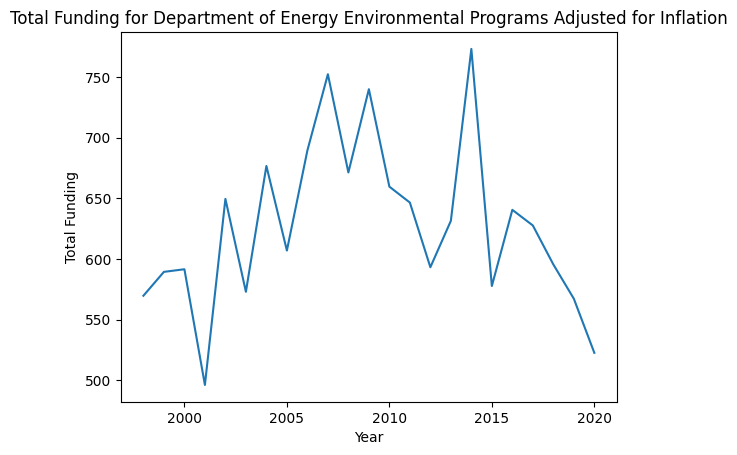

In [68]:
# using FRED API inflation adjust the data
inflation = pd.read_csv('data/inflation/CPIAUCNS.csv')

sums_DepEPInflation = {}
# adjust the data
for year in sums_DepEP:
    # get the inflation index for the year
    inflation_index = inflation[inflation['DATE'].str.contains(str(year))]['CPIAUCNS'].values[0]
    print(inflation_index, sums_DepEP[year])
    sums_DepEPInflation[year] = sums_DepEP[year] / float(inflation_index)

# graph the data
plt.plot(sums_DepEPInflation.keys(), sums_DepEPInflation.values())
plt.title('Total Funding for Department of Energy Environmental Programs Adjusted for Inflation')
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.show()

In [61]:
# convert date to just year
inflation['YEAR'] = pd.to_datetime(inflation['DATE']).dt.year
inflation.head()

,DATE,CPIAUCNS,YEAR
0,1913-01-01,9.8833333333333333,1913
1,1914-01-01,10.0166666666666667,1914
2,1915-01-01,10.1083333333333333,1915
3,1916-01-01,10.8833333333333333,1916
4,1917-01-01,12.8250000000000000,1917


In [69]:
# convert the inflation adjusted data to a dataframe
sums_DepEPInflation_df = pd.DataFrame.from_dict(sums_DepEPInflation, orient='index', columns=['Total Funding'])
sums_DepEPInflation_df.head()

,Total Funding
1998,569.725474
1999,589.392166
2000,591.544715
2001,496.180346
2002,649.556637


<Axes: xlabel='Total Funding DepEP Inflation Adjusted', ylabel='RENEWABLES QUANTITY'>

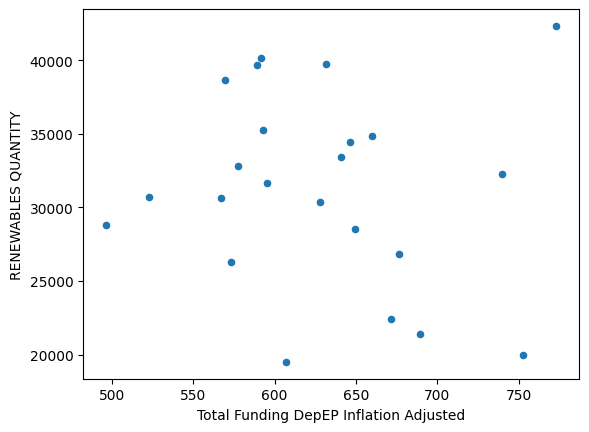

In [70]:
# make a scatter plot of this against the renewables quantity
pd.concat(
    [
        sums_DepEPInflation_df.rename(columns={'Total Funding': 'Total Funding DepEP Inflation Adjusted'}),
        pricing_df['RENEWABLES QUANTITY']
    ],
    axis=1
).plot.scatter(y='RENEWABLES QUANTITY', x='Total Funding DepEP Inflation Adjusted')

In [51]:
# create a linear regression model between the two
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pricing_df['RENEWABLES QUANTITY'].values.reshape(-1, 1), sums_DepEP_df['Total Funding'].values)
model.coef_, model.intercept_ = model.coef_[0], model.intercept_
model.coef_, model.intercept_

(0.018497070513187577, 133228.0974877644)

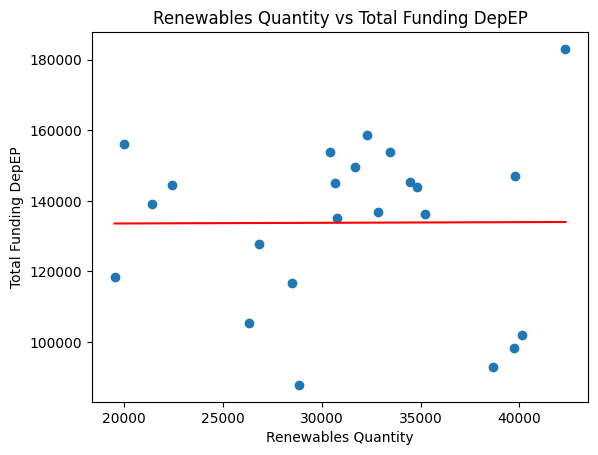

In [50]:

# plot the data
plt.scatter(pricing_df['RENEWABLES QUANTITY'], sums_DepEP_df['Total Funding'])

X = np.linspace(min(pricing_df['RENEWABLES QUANTITY']), max(pricing_df['RENEWABLES QUANTITY']))
y = model.coef_ * X + model.intercept_

plt.plot(X, y, color='red')

plt.xlabel('Renewables Quantity')
plt.ylabel('Total Funding DepEP')
plt.title('Renewables Quantity vs Total Funding DepEP')
plt.show()

In [49]:
y

array([133265.05463465, 133265.06293946, 133265.07124426, 133265.07954907,
       133265.08785388, 133265.09615869, 133265.10446349, 133265.1127683 ,
       133265.12107311, 133265.12937791, 133265.13768272, 133265.14598753,
       133265.15429234, 133265.16259714, 133265.17090195, 133265.17920676,
       133265.18751156, 133265.19581637, 133265.20412118, 133265.21242599,
       133265.22073079, 133265.2290356 , 133265.23734041, 133265.24564521,
       133265.25395002, 133265.26225483, 133265.27055964, 133265.27886444,
       133265.28716925, 133265.29547406, 133265.30377886, 133265.31208367,
       133265.32038848, 133265.32869329, 133265.33699809, 133265.3453029 ,
       133265.35360771, 133265.36191252, 133265.37021732, 133265.37852213,
       133265.38682694, 133265.39513174, 133265.40343655, 133265.41174136,
       133265.42004617, 133265.42835097, 133265.43665578, 133265.44496059,
       133265.45326539, 133265.4615702 ])

In [ ]:
# 

In [ ]:
data = pd.read_csv('data/RGGIAuctions/auction.csv')
# make column numeric [' Clearing Price']
data[' Clearing Price'] = pd.to_numeric(data[' Clearing Price'], errors='coerce')
data.head()

,Auction,Date,Quantity Offered,CCR Sold,Quantity Sold,Clearing Price,Total Proceeds
76,Auction 1,2008-09-25,12565387,,12565387,3.07,38575738.09
75,Auction 2,2008-12-17,31505898,,31505898,3.38,106489935.24
74,Auction 3 (Future),2009-03-18,2175513,,2175513,3.05,
73,Auction 3,2009-03-18,31513765,,31513765,3.51,117248629.80
72,Auction 4 (Future),2009-06-17,2172540,,2172540,2.06,


In [18]:
data.describe()

,Quantity Offered,Quantity Sold,Clearing Price
count,7.700000e+01,7.700000e+01,75.000000
mean,2.036367e+07,1.849899e+07,5.608667
std,1.245300e+07,1.069966e+07,4.856922
min,1.864951e+06,0.000000e+00,1.860000
25%,1.359011e+07,1.336065e+07,1.990000
50%,1.623750e+07,1.623750e+07,4.000000
75%,2.859170e+07,2.427216e+07,5.885000
max,4.559597e+07,4.199581e+07,25.750000


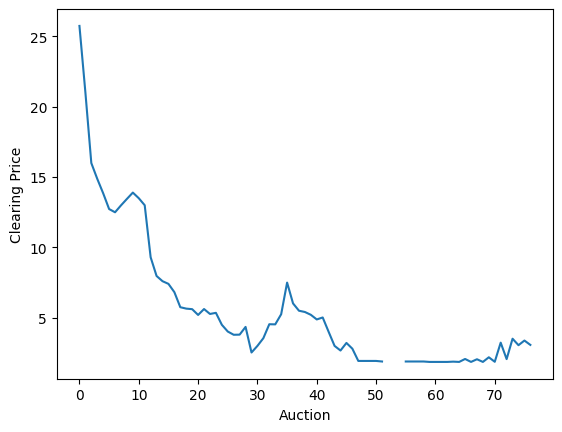

In [25]:
# graph the RGGI auction clearing prices
import matplotlib.pyplot as plt

plt.plot(
    # reverse the list so the auctions are in order
    data[' Clearing Price'].values[::-1]
)
plt.ylabel('Clearing Price')
plt.xlabel('Auction')
plt.show()